In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

In [2]:
exited_df_3 = pd.read_csv("Exited_Companies.csv", encoding='unicode_escape')

In [3]:
emerging_df_3 = pd.read_csv("Emerging_Companies.csv", encoding='unicode_escape')

In [4]:
existing_df_3 = pd.read_csv("Existing_Companies.csv", encoding='unicode_escape')

### Emerging Unicorn Companies.

In [5]:
emerging_df_3.head()

,Company,Post Money Value,Total Equity Funding,Lead Investors Include,Country,Continent
0,Nxtra Data,986,237,The Carlyle Group,India,Asia
1,Butternut Box,985,467,General Atlantic,United Kingdom,Europe
2,Delphix,981,120,Fidelity,United States,North America
3,Bizongo,980,290,Schroder Adveq,India,Asia
4,OpenStore,970,137,Lux Capital,United States,North America


In [6]:
# Display data types of each column
data_types_report = emerging_df_3.dtypes

# Count the number of categorical and numerical columns
categorical_columns = emerging_df_3.select_dtypes(include='object').columns
numerical_columns = emerging_df_3.select_dtypes(exclude='object').columns

num_categorical_columns = len(categorical_columns)
num_numerical_columns = len(numerical_columns)

# Print the report
print("Data Types Report:")
print(data_types_report)
print("Number of Categorical Columns:", num_categorical_columns)
print("Number of Numerical Columns:", num_numerical_columns)

Data Types Report:
Company                   object
Post Money Value           int64
Total Equity Funding       int64
Lead Investors Include    object
Country                   object
Continent                 object
dtype: object
Number of Categorical Columns: 4
Number of Numerical Columns: 2


In [7]:
emerging_df_3.describe()

,Post Money Value,Total Equity Funding
count,383.000000,383.000000
mean,680.130548,177.018277
std,142.145283,113.246902
min,500.000000,0.000000
25%,550.000000,108.500000
50%,662.000000,154.000000
75%,800.000000,218.000000
max,986.000000,935.000000


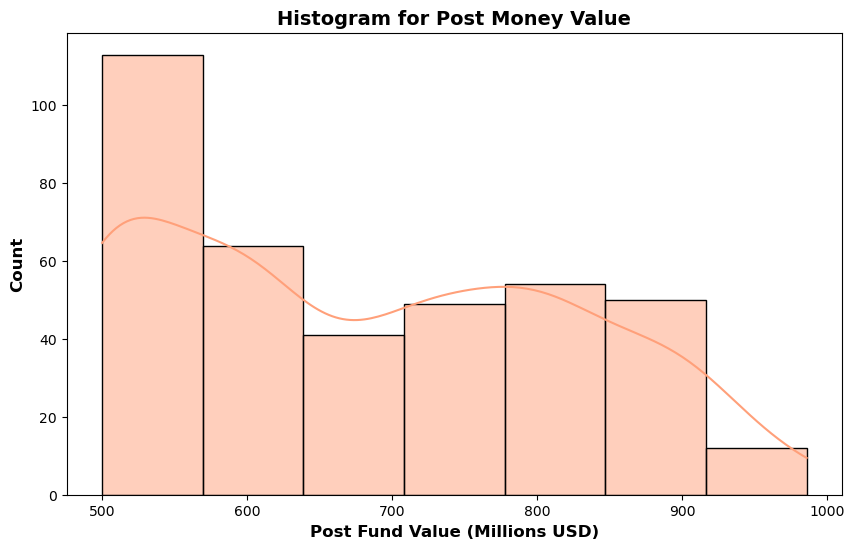

In [8]:
# Create a histogram for Post Money Value
plt.figure(figsize=(10, 6))
sns.histplot(emerging_df_3['Post Money Value'], bins=7, kde=True, color='lightsalmon', edgecolor='black')
plt.title('Histogram for Post Money Value', fontsize=14, fontweight='bold')
plt.xlabel('Post Fund Value (Millions USD)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

The histogram indicates that there's an outlier in our data, and it's skewed towards the left side. Specifically, it shows that a company called "Coro" was valued at only 0.298 million dollars in our dataset. However, we suspect that this is an outlier because a rising star in the business world, known as a unicorn, typically has a valuation well above $500 million.

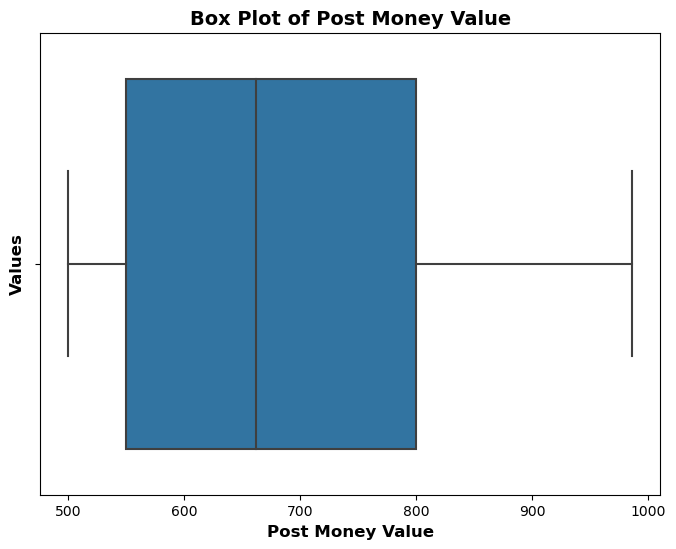

In [9]:
# Create box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=emerging_df_3['Post Money Value'])

# Add title and labels
plt.title('Box Plot of Post Money Value', fontsize=14, fontweight='bold')
plt.xlabel('Post Money Value', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.show()

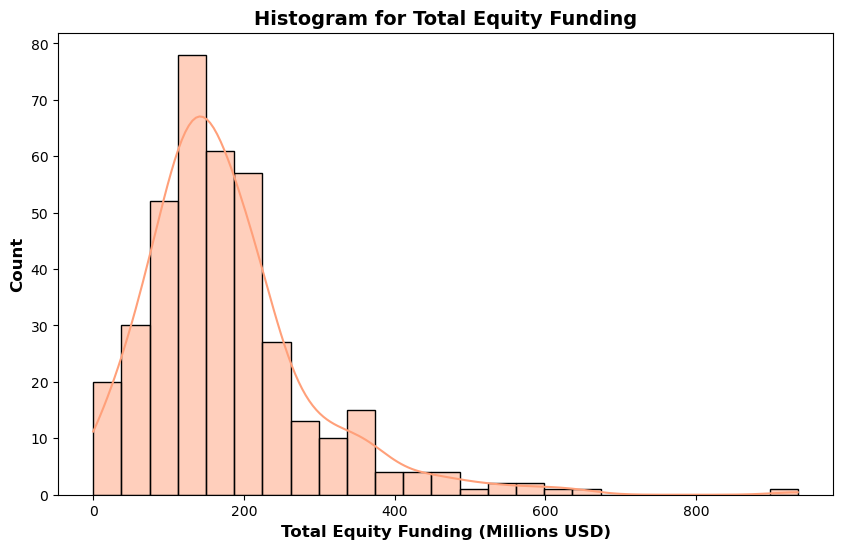

In [10]:
# Create a histogram for Total Equity Funding
plt.figure(figsize=(10, 6))
sns.histplot(emerging_df_3['Total Equity Funding'], bins=25, kde=True, color='lightsalmon', edgecolor='black')
plt.title('Histogram for Total Equity Funding', fontsize=14, fontweight='bold')
plt.xlabel('Total Equity Funding (Millions USD)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

According to the histogram, the majority of the companies' total equity funding ranges from 0 to 200 million. There is one company that has received over 800 million total equity funding. Despite being an outlier, it is acceptable. There may be companies with a total equity fund of more than 800 million.

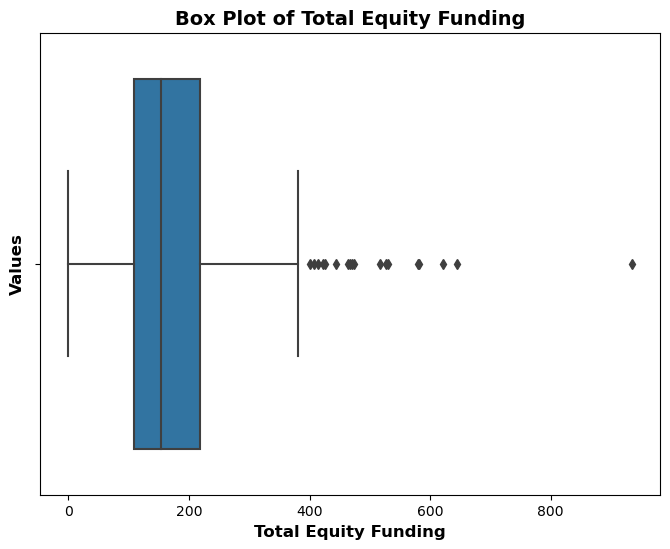

In [11]:
# Create box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=emerging_df_3['Total Equity Funding'])

# Add title and labels
plt.title('Box Plot of Total Equity Funding', fontsize=14, fontweight='bold')
plt.xlabel('Total Equity Funding', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.show()

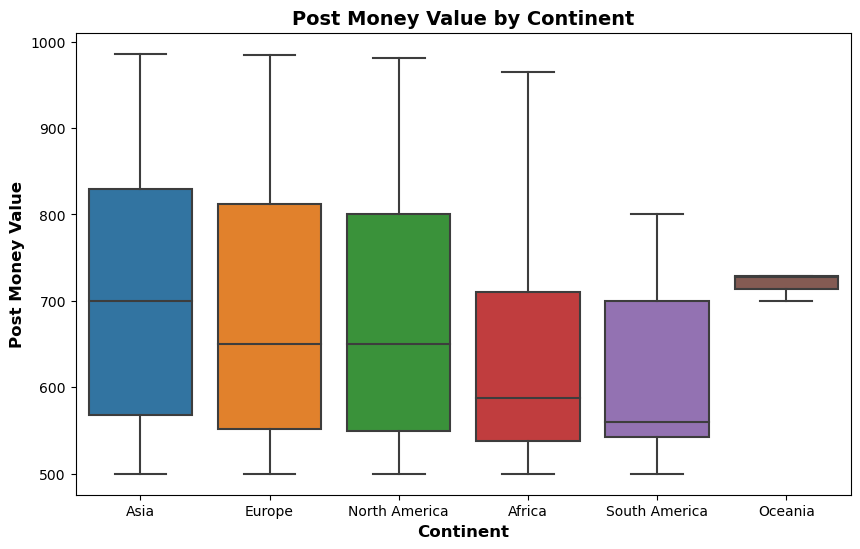

In [12]:
# Create the boxplot
plt.figure(figsize=(10, 6)) # Adjust size if necessary
sns.boxplot(data=emerging_df_3, x='Continent', y='Post Money Value')

# Set title and labels
plt.title('Post Money Value by Continent', fontsize=14, fontweight='bold')
plt.xlabel('Continent', fontsize=12, fontweight='bold')
plt.ylabel('Post Money Value', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

#### K Means Clustering Model Creation

In [13]:
# Check the number of missing values
missing_values = emerging_df_3.isna().sum()
print("Missing values count per column:")
print(missing_values)

Missing values count per column:
Company                   0
Post Money Value          0
Total Equity Funding      0
Lead Investors Include    0
Country                   0
Continent                 0
dtype: int64


In [14]:
# Isolate all numeric features
emerging_df_3_num = emerging_df_3.select_dtypes(exclude=['object'])
emerging_df_3_num.head()

,Post Money Value,Total Equity Funding
0,986,237
1,985,467
2,981,120
3,980,290
4,970,137


C:\Users\chith\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


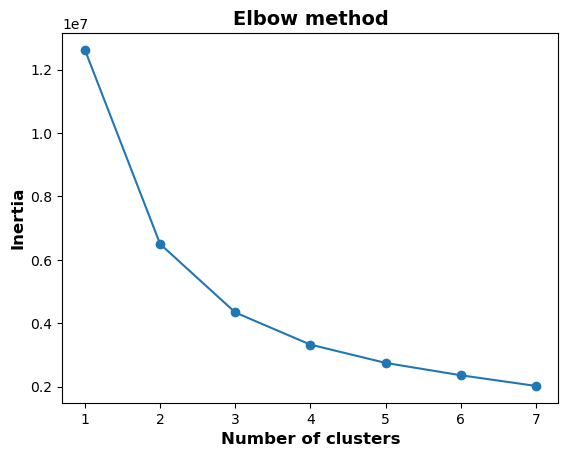

In [15]:
# elbow point refers to the point on the plot where the inertia values start decreasing at a slower rate. 
# visualize the inertia values for different numbers of clusters in order to identify the optimal number of clusters using the elbow method.

inertias = []  # Initialize the list before the loop

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(emerging_df_3_num)
    inertias.append(kmeans.inertia_) # represents the sum of squared distances of samples to their closest cluster center

plt.plot(range(1, 8), inertias, marker='o')
plt.title('Elbow method', fontsize=14, fontweight='bold')
plt.xlabel('Number of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Inertia', fontsize=12, fontweight='bold')
plt.show()

In [16]:
# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the model to your data
kmeans.fit(emerging_df_3_num)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

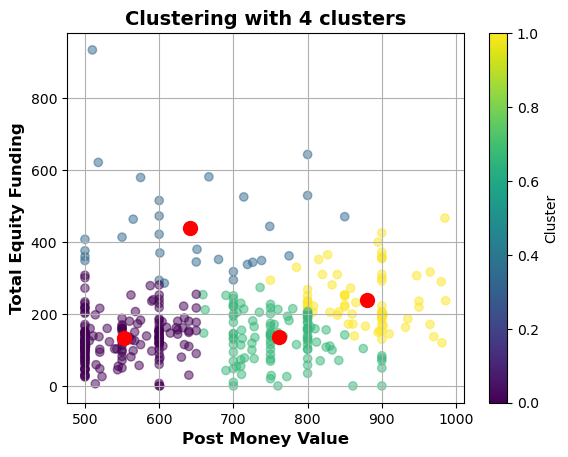

In [17]:
# Assuming the columns of your DataFrame are named 'feature1' and 'feature2'
feature1 = emerging_df_3_num['Post Money Value']
feature2 = emerging_df_3_num['Total Equity Funding']

# Create a scatter plot of the data points with their assigned clusters
plt.scatter(feature1, feature2, c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='red', s=100)  # Plot centroids

plt.title('Clustering with 4 clusters', fontsize=14, fontweight='bold')
plt.xlabel('Post Money Value', fontsize=12, fontweight='bold')
plt.ylabel('Total Equity Funding', fontsize=12, fontweight='bold')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#### K Modes Clustering Model Creation

In [18]:
# Isolate all categorical features
emerging_df_3_cat = emerging_df_3.select_dtypes(include=['object'])
emerging_df_3_cat.head()

,Company,Lead Investors Include,Country,Continent
0,Nxtra Data,The Carlyle Group,India,Asia
1,Butternut Box,General Atlantic,United Kingdom,Europe
2,Delphix,Fidelity,United States,North America
3,Bizongo,Schroder Adveq,India,Asia
4,OpenStore,Lux Capital,United States,North America


In [19]:
! pip install kmodes

##### Lead Investors Include Vs Country

In [20]:
new_df = emerging_df_3[['Lead Investors Include', 'Country']]
new_df

,Lead Investors Include,Country
0,The Carlyle Group,India
1,General Atlantic,United Kingdom
2,Fidelity,United States
3,Schroder Adveq,India
4,Lux Capital,United States
...,...,...
378,Explorer 1 Fund,United States
379,Multple Lead Investors,United States
380,Multple Lead Investors,United States
381,Penske Media Corporation,United States


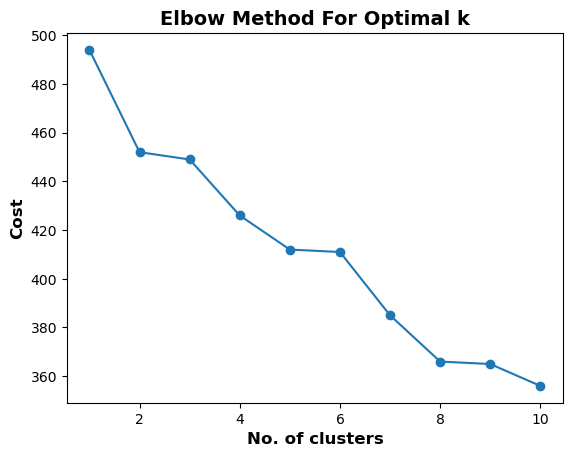

In [21]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    #kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0, random_state=42)
    kmode.fit_predict(new_df)
    cost.append(kmode.cost_) # Cost is the sum of all the dissimilarities between the clusters
    
plt.plot(K, cost, marker = 'o')
plt.xlabel('No. of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Cost', fontsize=12, fontweight='bold')
plt.title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
plt.show()

The elbow chart is changing in every run because of the random initialization of centroids in the K-Modes clustering algorithm. In the K-Modes algorithm, the initial centroids are randomly chosen at the beginning of each run, which can lead to slightly different clustering results each time the algorithm is run.
To address this issue, you can set a random seed before running the clustering algorithm to ensure reproducibility. For example, you can use random_state parameter in the KModes function to set a specific random seed

In [22]:
# Building the model with 8 clusters
kmode = KModes(n_clusters=8, init = "random", n_init = 5, verbose=0, random_state = 42)
clusters = kmode.fit_predict(new_df)
clusters

array([7, 3, 1, 7, 1, 6, 0, 1, 4, 7, 0, 0, 1, 0, 4, 0, 7, 1, 1, 7, 0, 7,
       7, 0, 0, 3, 4, 0, 4, 0, 1, 1, 1, 4, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 3, 7, 0, 4, 1, 0, 3, 1, 7, 1, 0,
       1, 0, 0, 0, 2, 1, 3, 7, 0, 7, 0, 0, 0, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       4, 3, 1, 1, 0, 1, 1, 4, 0, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 3, 0, 7,
       1, 1, 1, 0, 0, 6, 1, 7, 1, 0, 6, 1, 1, 1, 1, 0, 1, 7, 1, 6, 1, 1,
       0, 1, 1, 1, 1, 4, 3, 0, 1, 7, 0, 7, 0, 0, 4, 0, 0, 0, 0, 1, 1, 1,
       3, 3, 7, 0, 0, 0, 7, 7, 4, 1, 1, 1, 6, 0, 7, 1, 4, 4, 3, 1, 1, 4,
       1, 4, 1, 1, 1, 0, 4, 3, 0, 0, 7, 0, 1, 7, 7, 0, 0, 0, 0, 1, 7, 1,
       1, 4, 3, 0, 1, 0, 3, 1, 0, 7, 4, 0, 4, 1, 0, 1, 1, 1, 1, 0, 7, 1,
       1, 7, 0, 7, 0, 1, 3, 1, 1, 1, 4, 0, 4, 1, 4, 5, 4, 0, 1, 1, 1, 4,
       1, 7, 0, 1, 1, 7, 0, 1, 7, 1, 0, 0, 0, 1, 0, 7, 0, 7, 0, 1, 0, 6,
       0, 1, 1, 4, 0, 1, 0, 0, 0, 1, 1, 4, 3, 0, 3, 0, 4, 1, 4, 1, 6, 1,
       1, 1, 1, 0, 1, 1, 0, 4, 7, 0, 3, 0, 6, 7, 1,

In [23]:
new_df.insert(0, "Cluster", clusters, True)
new_df

,Cluster,Lead Investors Include,Country
0,7,The Carlyle Group,India
1,3,General Atlantic,United Kingdom
2,1,Fidelity,United States
3,7,Schroder Adveq,India
4,1,Lux Capital,United States
...,...,...,...
378,1,Explorer 1 Fund,United States
379,4,Multple Lead Investors,United States
380,4,Multple Lead Investors,United States
381,1,Penske Media Corporation,United States


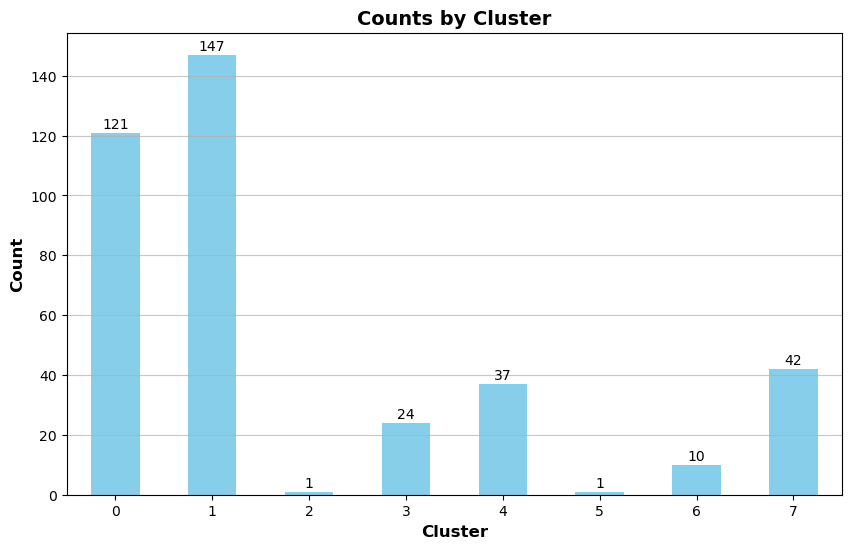

In [24]:
cluster_counts = new_df.groupby("Cluster").size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = cluster_counts.plot(kind="bar", color='skyblue')
plt.title("Counts by Cluster", fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Adding counts to the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5, str(i.get_height()), ha='center', va='bottom')

plt.show()

In [25]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'K modes Emerging Unicorns Country.csv'

# Export the dataframe to a CSV file
new_df.to_csv(csv_file_path, index=False)

print(f"Dataframe has been exported to {csv_file_path}.")

Dataframe has been exported to K modes Emerging Unicorns Country.csv.


##### Lead Investors Include Vs Continent

In [26]:
new_df_1 = emerging_df_3[['Lead Investors Include', 'Continent']]
new_df_1

,Lead Investors Include,Continent
0,The Carlyle Group,Asia
1,General Atlantic,Europe
2,Fidelity,North America
3,Schroder Adveq,Asia
4,Lux Capital,North America
...,...,...
378,Explorer 1 Fund,North America
379,Multple Lead Investors,North America
380,Multple Lead Investors,North America
381,Penske Media Corporation,North America


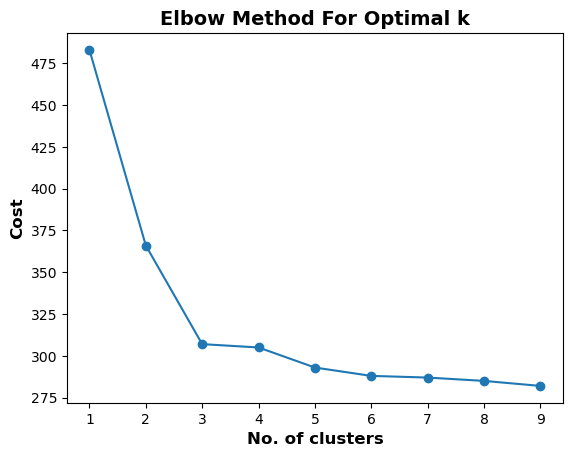

In [27]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    #kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0, random_state=42)
    kmode.fit_predict(new_df_1)
    cost.append(kmode.cost_) # Cost is the sum of all the dissimilarities between the clusters
    
plt.plot(K, cost, marker = 'o')
plt.xlabel('No. of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Cost', fontsize=12, fontweight='bold')
plt.title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
plt.show()

In [28]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=0, random_state = 42)
clusters = kmode.fit_predict(new_df_1)
clusters

array([1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1,
       0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0,

In [29]:
new_df_1.insert(0, "Cluster", clusters, True)
new_df_1

,Cluster,Lead Investors Include,Continent
0,1,The Carlyle Group,Asia
1,2,General Atlantic,Europe
2,0,Fidelity,North America
3,1,Schroder Adveq,Asia
4,0,Lux Capital,North America
...,...,...,...
378,0,Explorer 1 Fund,North America
379,0,Multple Lead Investors,North America
380,0,Multple Lead Investors,North America
381,0,Penske Media Corporation,North America


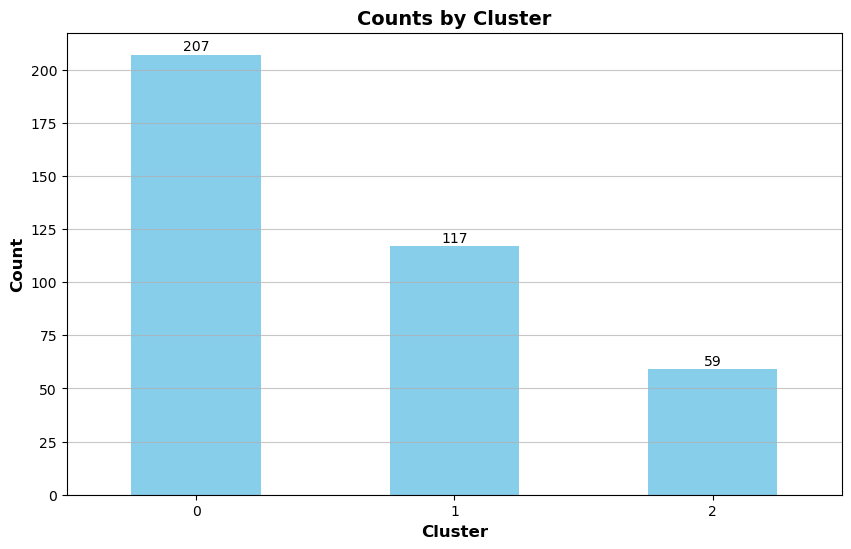

In [30]:
cluster_counts = new_df_1.groupby("Cluster").size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = cluster_counts.plot(kind="bar", color='skyblue')
plt.title("Counts by Cluster", fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Adding counts to the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5, str(i.get_height()), ha='center', va='bottom')

plt.show()

In [31]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'K modes Emerging Unicorns Continent.csv'

# Export the dataframe to a CSV file
new_df_1.to_csv(csv_file_path, index=False)

print(f"Dataframe has been exported to {csv_file_path}.")

Dataframe has been exported to K modes Emerging Unicorns Continent.csv.


### Exited Unicron Comapnies

In [32]:
exited_df_3.head()

,Organisation,Country,Industry,Main Industry,Month,Year,Exit Reason,Main Reason
0,10X Genomics,United States,"BioSoftware & Technology, Genetics, Health Car...",Healthcare & BioTechnology,September,2019,Bankrupt,Bankrupt
1,17zuoye,China,"E-Learning, EdTech, Education, Internet, Langu...",Education and EdTech,December,2020,Bankrupt,Bankrupt
2,23andMe,United States,"BioSoftware & Technology, Genetics, Life Science",Healthcare & BioTechnology,June,2021,SPAC merger,Merger
3,51 Credit Card Manager,China,"Credit Cards, Finance, Financial Services, Fin...",Finance and FinTech,July,2018,Bankrupt,Bankrupt
4,9F Group,China,"Financial Services, FinTech",Finance and FinTech,August,2019,IPO,IPO


In [33]:
# Display data types of each column
data_types_report = exited_df_3.dtypes

# Count the number of categorical and numerical columns
categorical_columns = exited_df_3.select_dtypes(include='object').columns
numerical_columns = exited_df_3.select_dtypes(exclude='object').columns

num_categorical_columns = len(categorical_columns)
num_numerical_columns = len(numerical_columns)

# Print the report
print("Data Types Report:")
print(data_types_report)
print("\nNumber of Categorical Columns:", num_categorical_columns)
print("Number of Numerical Columns:", num_numerical_columns)

Data Types Report:
Organisation     object
Country          object
Industry         object
Main Industry    object
Month            object
Year              int64
Exit Reason      object
Main Reason      object
dtype: object

Number of Categorical Columns: 7
Number of Numerical Columns: 1


In [34]:
exited_df_3.describe()

,Year
count,468.000000
mean,2019.506410
std,2.595904
min,2006.000000
25%,2018.000000
50%,2020.000000
75%,2021.000000
max,2023.000000


#### K Modes Clustering Model Creation

##### Main Industry Vs Main Reason

In [35]:
Exited_industry_vs_reason_df = exited_df_3[['Main Industry', 'Main Reason']]
Exited_industry_vs_reason_df

,Main Industry,Main Reason
0,Healthcare & BioTechnology,Bankrupt
1,Education and EdTech,Bankrupt
2,Healthcare & BioTechnology,Merger
3,Finance and FinTech,Bankrupt
4,Finance and FinTech,IPO
...,...,...
463,Software & Technology,Merger
464,Software & Technology,IPO
465,Software & Technology,Bankrupt
466,Media and Entertainment,IPO


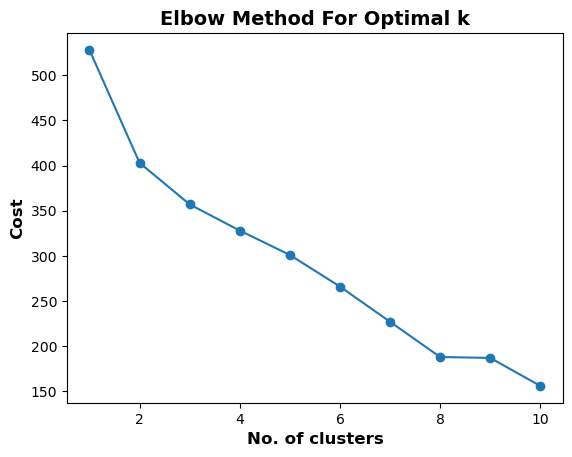

In [36]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0, random_state=42)
    kmode.fit_predict(Exited_industry_vs_reason_df)
    cost.append(kmode.cost_) # Cost is the sum of all the dissimilarities between the clusters
    
plt.plot(K, cost, marker = 'o')
plt.xlabel('No. of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Cost', fontsize=12, fontweight='bold')
plt.title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
plt.show()

In [37]:
kmode = KModes(n_clusters=8, init = "random", n_init = 5, verbose=0, random_state = 42)
clusters = kmode.fit_predict(Exited_industry_vs_reason_df)
clusters

array([0, 0, 0, 4, 1, 3, 6, 0, 1, 4, 7, 3, 5, 3, 2, 5, 7, 0, 5, 3, 2, 0,
       0, 4, 6, 3, 3, 0, 5, 0, 6, 2, 6, 4, 3, 1, 1, 0, 1, 6, 4, 0, 0, 3,
       2, 0, 0, 1, 3, 4, 0, 6, 4, 7, 4, 1, 1, 5, 4, 0, 6, 1, 0, 0, 3, 6,
       3, 2, 7, 0, 0, 6, 7, 6, 4, 0, 5, 0, 1, 1, 5, 6, 3, 1, 1, 1, 5, 2,
       3, 0, 0, 3, 7, 5, 0, 3, 4, 6, 0, 1, 1, 1, 0, 4, 3, 0, 1, 3, 0, 4,
       1, 3, 3, 1, 0, 3, 5, 2, 1, 7, 6, 1, 4, 0, 0, 7, 4, 3, 1, 6, 0, 1,
       1, 6, 1, 3, 3, 3, 4, 0, 1, 0, 1, 3, 5, 4, 1, 0, 6, 1, 0, 0, 3, 5,
       3, 1, 2, 2, 0, 5, 7, 6, 0, 0, 4, 1, 7, 3, 3, 0, 0, 4, 7, 2, 0, 0,
       0, 0, 1, 3, 3, 7, 0, 3, 0, 2, 2, 2, 7, 7, 7, 1, 6, 5, 6, 7, 0, 2,
       4, 4, 0, 0, 2, 5, 7, 0, 3, 0, 0, 1, 7, 7, 0, 0, 4, 1, 1, 4, 6, 3,
       3, 6, 5, 4, 1, 3, 1, 1, 1, 2, 0, 6, 0, 0, 0, 3, 4, 0, 3, 2, 5, 1,
       6, 7, 1, 3, 0, 0, 0, 1, 1, 1, 1, 7, 1, 3, 5, 1, 4, 0, 5, 0, 0, 6,
       6, 0, 1, 5, 4, 1, 0, 7, 5, 1, 4, 4, 0, 0, 1, 0, 3, 7, 0, 3, 2, 3,
       4, 7, 1, 3, 0, 0, 5, 6, 0, 6, 1, 7, 7, 2, 0,

In [38]:
Exited_industry_vs_reason_df.insert(0, "Cluster", clusters, True)
Exited_industry_vs_reason_df

,Cluster,Main Industry,Main Reason
0,0,Healthcare & BioTechnology,Bankrupt
1,0,Education and EdTech,Bankrupt
2,0,Healthcare & BioTechnology,Merger
3,4,Finance and FinTech,Bankrupt
4,1,Finance and FinTech,IPO
...,...,...,...
463,2,Software & Technology,Merger
464,5,Software & Technology,IPO
465,3,Software & Technology,Bankrupt
466,0,Media and Entertainment,IPO


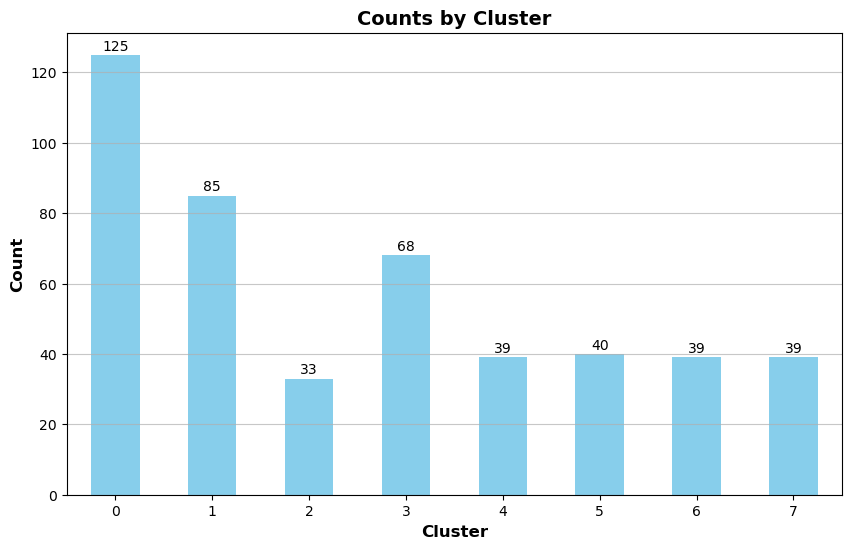

In [39]:
cluster_counts = Exited_industry_vs_reason_df.groupby("Cluster").size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = cluster_counts.plot(kind="bar", color='skyblue')
plt.title("Counts by Cluster", fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Adding counts to the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5, str(i.get_height()), ha='center', va='bottom')

plt.show()

In [40]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'K modes Exited Unicorns.csv'

# Export the dataframe to a CSV file
Exited_industry_vs_reason_df.to_csv(csv_file_path, index=False)

print(f"Dataframe has been exported to {csv_file_path}.")

Dataframe has been exported to K modes Exited Unicorns.csv.


### Existing Unicron Comapnies

In [41]:
existing_df_3.head()

,Company,Post Money Value (Billions),Total Equity Funding (Millions),Lead Investors Include,Country,Continent,Month,Year,Industry
0,01.AI,1,0.0,Kai-Fu Lee,China,Asia,10,2015,Enterprise Tech
1,1047 Games,2,117.0,Lightspeed Venture Partners,United States,North America,9,2021,Media & Entertainment
2,1inch Limited,2,190.0,Amber Group,United States,North America,5,2021,Enterprise Tech
3,1KMXC,1,86.0,Haoteng Asia,China,Asia,8,2021,Industrials
4,1Komma5°,1,490.0,2150,Germany,Europe,6,2023,Industrials


In [42]:
# Display data types of each column
data_types_report = existing_df_3.dtypes

# Count the number of categorical and numerical columns
categorical_columns = existing_df_3.select_dtypes(include='object').columns
numerical_columns = existing_df_3.select_dtypes(exclude='object').columns

num_categorical_columns = len(categorical_columns)
num_numerical_columns = len(numerical_columns)

# Print the report
print("Data Types Report:")
print(data_types_report)
print("\nNumber of Categorical Columns:", num_categorical_columns)
print("Number of Numerical Columns:", num_numerical_columns)

Data Types Report:
Company                             object
Post Money Value (Billions)          int64
Total Equity Funding (Millions)    float64
Lead Investors Include              object
Country                             object
Continent                           object
Month                                int64
Year                                 int64
Industry                            object
dtype: object

Number of Categorical Columns: 5
Number of Numerical Columns: 4


In [43]:
existing_df_3.describe()

,Post Money Value (Billions),Total Equity Funding (Millions),Month,Year
count,1498.000000,1498.000000,1498.000000,1498.00000
mean,3.331776,598.463110,6.437250,2020.40988
std,9.086319,1146.677894,3.408955,2.04334
min,1.000000,0.000000,1.000000,2007.00000
25%,1.000000,204.000000,4.000000,2020.00000
50%,2.000000,352.500000,6.000000,2021.00000
75%,3.000000,614.000000,9.000000,2022.00000
max,220.000000,20000.000000,12.000000,2028.00000


#### K Means Clustering Model Creation

#### K Modes Clustering Model Creation

##### Lead Investors Include Vs Country

In [44]:
new_df_2 = existing_df_3[['Lead Investors Include', 'Country']]
new_df_2

,Lead Investors Include,Country
0,Kai-Fu Lee,China
1,Lightspeed Venture Partners,United States
2,Amber Group,United States
3,Haoteng Asia,China
4,2150,Germany
...,...,...
1493,Multiple Investors,China
1494,Yingke Capital,China
1495,Multiple Investors,Saudi Arabia
1496,Lightspeed Venture Partners,United States


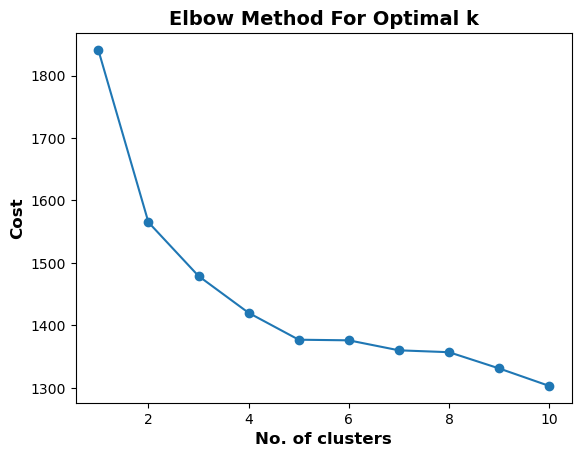

In [45]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    #kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0, random_state=42)
    kmode.fit_predict(new_df_2)
    cost.append(kmode.cost_) # Cost is the sum of all the dissimilarities between the clusters
    
plt.plot(K, cost, marker = 'o')
plt.xlabel('No. of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Cost', fontsize=12, fontweight='bold')
plt.title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
plt.show()

In [46]:
# Building the model with 5 clusters
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=0, random_state = 42)
clusters = kmode.fit_predict(new_df_2)
clusters

array([1, 2, 2, ..., 0, 2, 0], dtype=uint16)

In [47]:
new_df_2.insert(0, "Cluster", clusters, True)
new_df_2

,Cluster,Lead Investors Include,Country
0,1,Kai-Fu Lee,China
1,2,Lightspeed Venture Partners,United States
2,2,Amber Group,United States
3,1,Haoteng Asia,China
4,0,2150,Germany
...,...,...,...
1493,1,Multiple Investors,China
1494,1,Yingke Capital,China
1495,0,Multiple Investors,Saudi Arabia
1496,2,Lightspeed Venture Partners,United States


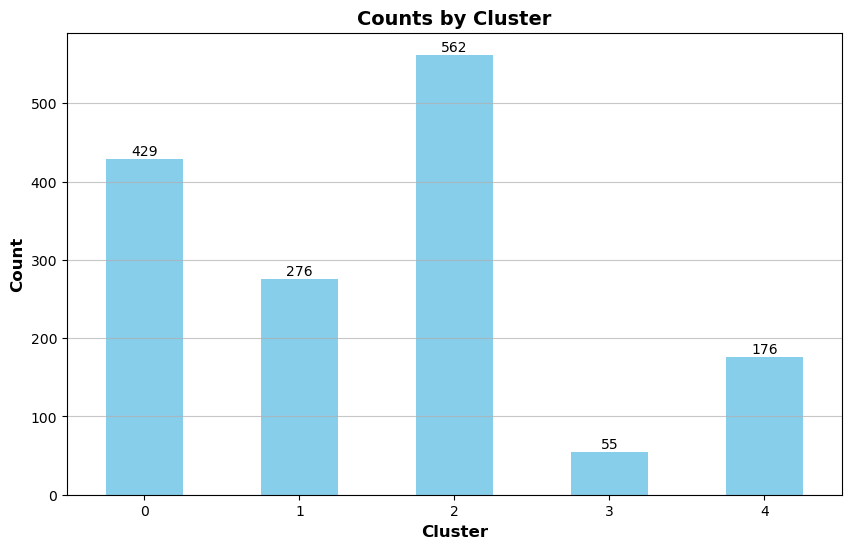

In [48]:
cluster_counts = new_df_2.groupby("Cluster").size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = cluster_counts.plot(kind="bar", color='skyblue')
plt.title("Counts by Cluster", fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Adding counts to the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5, str(i.get_height()), ha='center', va='bottom')

plt.show()

In [49]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'K modes Existing Unicorns Country.csv'

# Export the dataframe to a CSV file
new_df_2.to_csv(csv_file_path, index=False)

print(f"Dataframe has been exported to {csv_file_path}.")

Dataframe has been exported to K modes Existing Unicorns Country.csv.


##### Lead Investors Include Vs Continent

In [50]:
new_df_3 = existing_df_3[['Lead Investors Include', 'Continent']]
new_df_3

,Lead Investors Include,Continent
0,Kai-Fu Lee,Asia
1,Lightspeed Venture Partners,North America
2,Amber Group,North America
3,Haoteng Asia,Asia
4,2150,Europe
...,...,...
1493,Multiple Investors,Asia
1494,Yingke Capital,Asia
1495,Multiple Investors,Asia
1496,Lightspeed Venture Partners,North America


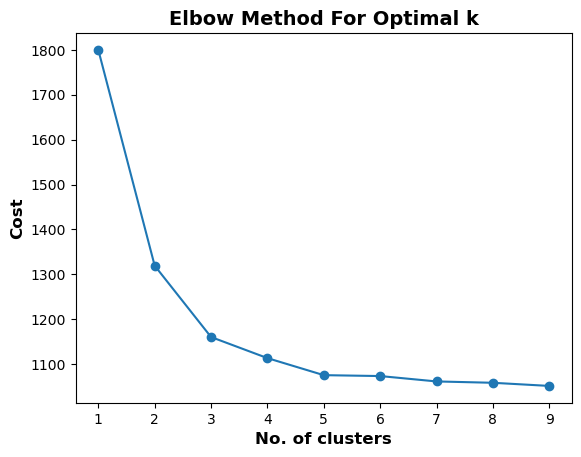

In [51]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    #kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0, random_state=42)
    kmode.fit_predict(new_df_3)
    cost.append(kmode.cost_) # Cost is the sum of all the dissimilarities between the clusters
    
plt.plot(K, cost, marker = 'o')
plt.xlabel('No. of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Cost', fontsize=12, fontweight='bold')
plt.title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
plt.show()

In [52]:
# Building the model with 5 clusters
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=0, random_state = 42)
clusters = kmode.fit_predict(new_df_3)
clusters

array([0, 3, 3, ..., 0, 3, 4], dtype=uint16)

In [53]:
new_df_3.insert(0, "Cluster", clusters, True)
new_df_3

,Cluster,Lead Investors Include,Continent
0,0,Kai-Fu Lee,Asia
1,3,Lightspeed Venture Partners,North America
2,3,Amber Group,North America
3,0,Haoteng Asia,Asia
4,1,2150,Europe
...,...,...,...
1493,0,Multiple Investors,Asia
1494,0,Yingke Capital,Asia
1495,0,Multiple Investors,Asia
1496,3,Lightspeed Venture Partners,North America


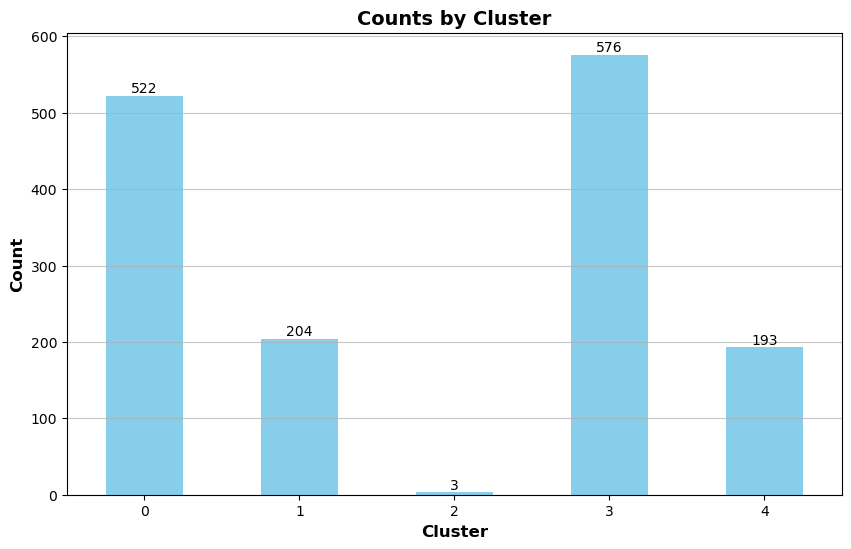

In [54]:
cluster_counts = new_df_3.groupby("Cluster").size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = cluster_counts.plot(kind="bar", color='skyblue')
plt.title("Counts by Cluster", fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Adding counts to the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5, str(i.get_height()), ha='center', va='bottom')

plt.show()

In [55]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'K modes Existing Unicorns Continent.csv'

# Export the dataframe to a CSV file
new_df_3.to_csv(csv_file_path, index=False)

print(f"Dataframe has been exported to {csv_file_path}.")

Dataframe has been exported to K modes Existing Unicorns Continent.csv.


##### Lead Investors Include Vs Industry

In [56]:
new_df_4 = existing_df_3[['Lead Investors Include', 'Industry']]
new_df_4

,Lead Investors Include,Industry
0,Kai-Fu Lee,Enterprise Tech
1,Lightspeed Venture Partners,Media & Entertainment
2,Amber Group,Enterprise Tech
3,Haoteng Asia,Industrials
4,2150,Industrials
...,...,...
1493,Multiple Investors,Enterprise Tech
1494,Yingke Capital,Industrials
1495,Multiple Investors,Financial Services
1496,Lightspeed Venture Partners,Financial Services


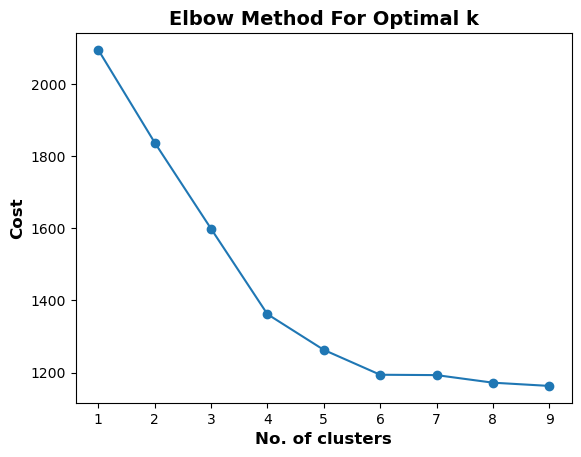

In [57]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    #kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0, random_state=42)
    kmode.fit_predict(new_df_4)
    cost.append(kmode.cost_) # Cost is the sum of all the dissimilarities between the clusters
    
plt.plot(K, cost, marker = 'o')
plt.xlabel('No. of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Cost', fontsize=12, fontweight='bold')
plt.title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
plt.show()

In [58]:
# Building the model with 6 clusters
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=0, random_state = 42)
clusters = kmode.fit_predict(new_df_4)
clusters

array([1, 5, 1, ..., 4, 4, 1], dtype=uint16)

In [59]:
new_df_4.insert(0, "Cluster", clusters, True)
new_df_4

,Cluster,Lead Investors Include,Industry
0,1,Kai-Fu Lee,Enterprise Tech
1,5,Lightspeed Venture Partners,Media & Entertainment
2,1,Amber Group,Enterprise Tech
3,0,Haoteng Asia,Industrials
4,0,2150,Industrials
...,...,...,...
1493,1,Multiple Investors,Enterprise Tech
1494,0,Yingke Capital,Industrials
1495,4,Multiple Investors,Financial Services
1496,4,Lightspeed Venture Partners,Financial Services


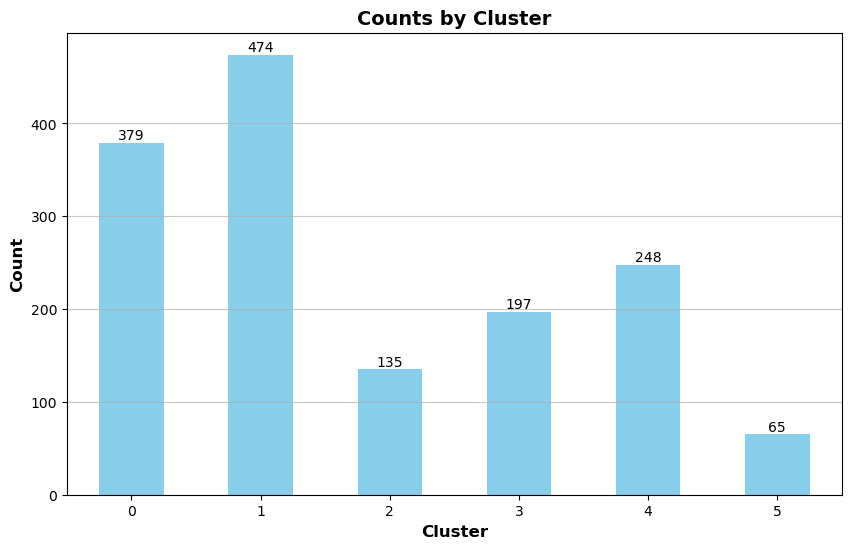

In [60]:
cluster_counts = new_df_4.groupby("Cluster").size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = cluster_counts.plot(kind="bar", color='skyblue')
plt.title("Counts by Cluster", fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Adding counts to the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5, str(i.get_height()), ha='center', va='bottom')

plt.show()

In [61]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'K modes Existing Unicorns Investors and Industry.csv'

# Export the dataframe to a CSV file
new_df_4.to_csv(csv_file_path, index=False)

print(f"Dataframe has been exported to {csv_file_path}.")

Dataframe has been exported to K modes Existing Unicorns Investors and Industry.csv.
